# Ludwig - Build deep learning model without code

Ludwig is a toolbox that allows users to train and test deep learning models without the need to write code. 

>   It is built on top of **TensorFlow**

To train a model you only need to provide below details and Ludwig will do the rest. 

> *   File containing your data
*   List of columns to use as inputs alongside with their datatypes
*   List of columns to use as outputs alongside with their datatypes

    input_features:
        -
            name: text
            type: text
            level: word
            encoder: parallel_cnn

    output_features:
        -
            name: class
            type: category

Datatype-based approach to deep learning model design makes the tool usable across many different use cases.

> Currently, the available datatypes in Ludwig are:

    binary
    numerical
    category
    set
    bag
    sequence
    text
    timeseries
    image
    audio
    date
    h3
    vector


> Different datatype for inputs and outputs, users can solve many different tasks, for instance:

    text input + category output = text classifier
    image input + category output = image classifier
    image input + text output = image captioning
    audio input + binary output = speaker verification
    text input + sequence output = named entity recognition / summarization
    category, numerical and binary inputs + numerical output = regression
    timeseries input + numerical output = forecasting model
    category, numerical and binary inputs + binary output = fraud detection

Ludwig provides a set of model architectures that can be combined together to create an end-to-end model for a given use case

**Text, Audio, Speech, Timeseries, Sequences Input**

> *   Stacked CNN
*   Parallel CNN
*   Stacked Parallel CNN
*   RNN
*   CNN RNN
*   Transformer / BERT

**Image Input**

> *   Stacked CNN
*   ResNet

**Configuration file**

The config can contain additional information, in particular how to preprocess each column in the data, which encoder and decoder to use for each one, architectural and training parameters, hyperparameters to optimize. 

**Additional Ludwig Features**

    ludwig internally use hyperopt for hyperparameter optimization.
    ludwig internally use horovod for distributed training.
    ludwig internally use FastAPI for model API serving. 
    ludwig provide lots of visualization to track and understand model outcome.

**References:**

https://arxiv.org/pdf/1909.07930.pdf

https://ludwig-ai.github.io/ludwig-docs/user_guide/

https://github.com/ludwig-ai/ludwig

https://www.slideshare.net/ds_mi/ludwig-a-codefree-deep-learning-toolbox-piero-molino-uber-ai




## Load Data from Google drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
!cp '/gdrive/My Drive/Deep_learning_app/Ludwig-tutorial/data/product_review/product_review.csv' .
!cp '/gdrive/My Drive/Deep_learning_app/Ludwig-tutorial/model_definition.yaml' .

In [3]:
!ls

model_definition.yaml  product_review.csv  sample_data


# Installation and demo

In [4]:
! pip install git+http://github.com/uber/ludwig.git -qq
! pip install ludwig[serve] -qq
#! pip install wandb -qq 

     |████████████████████████████████| 9.5MB 17.3MB/s 
     |████████████████████████████████| 706kB 52.1MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 1.7MB 18.4MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 9.2MB 57.9MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 81kB 13.0MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 


## Check GPU

In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Load Packages

In [6]:
import pygments
import pandas as pd
import matplotlib
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%matplotlib inline
import ludwig
from ludwig import visualize

In [ ]:
#import wandb
#run = wandb.init()

## Check Model configuration

In [ ]:
!pygmentize model_definition.yaml

input_features:
    -
        name: text
        type: text
        level: word
        encoder: parallel_cnn

output_features:
    -
        name: class
        type: category


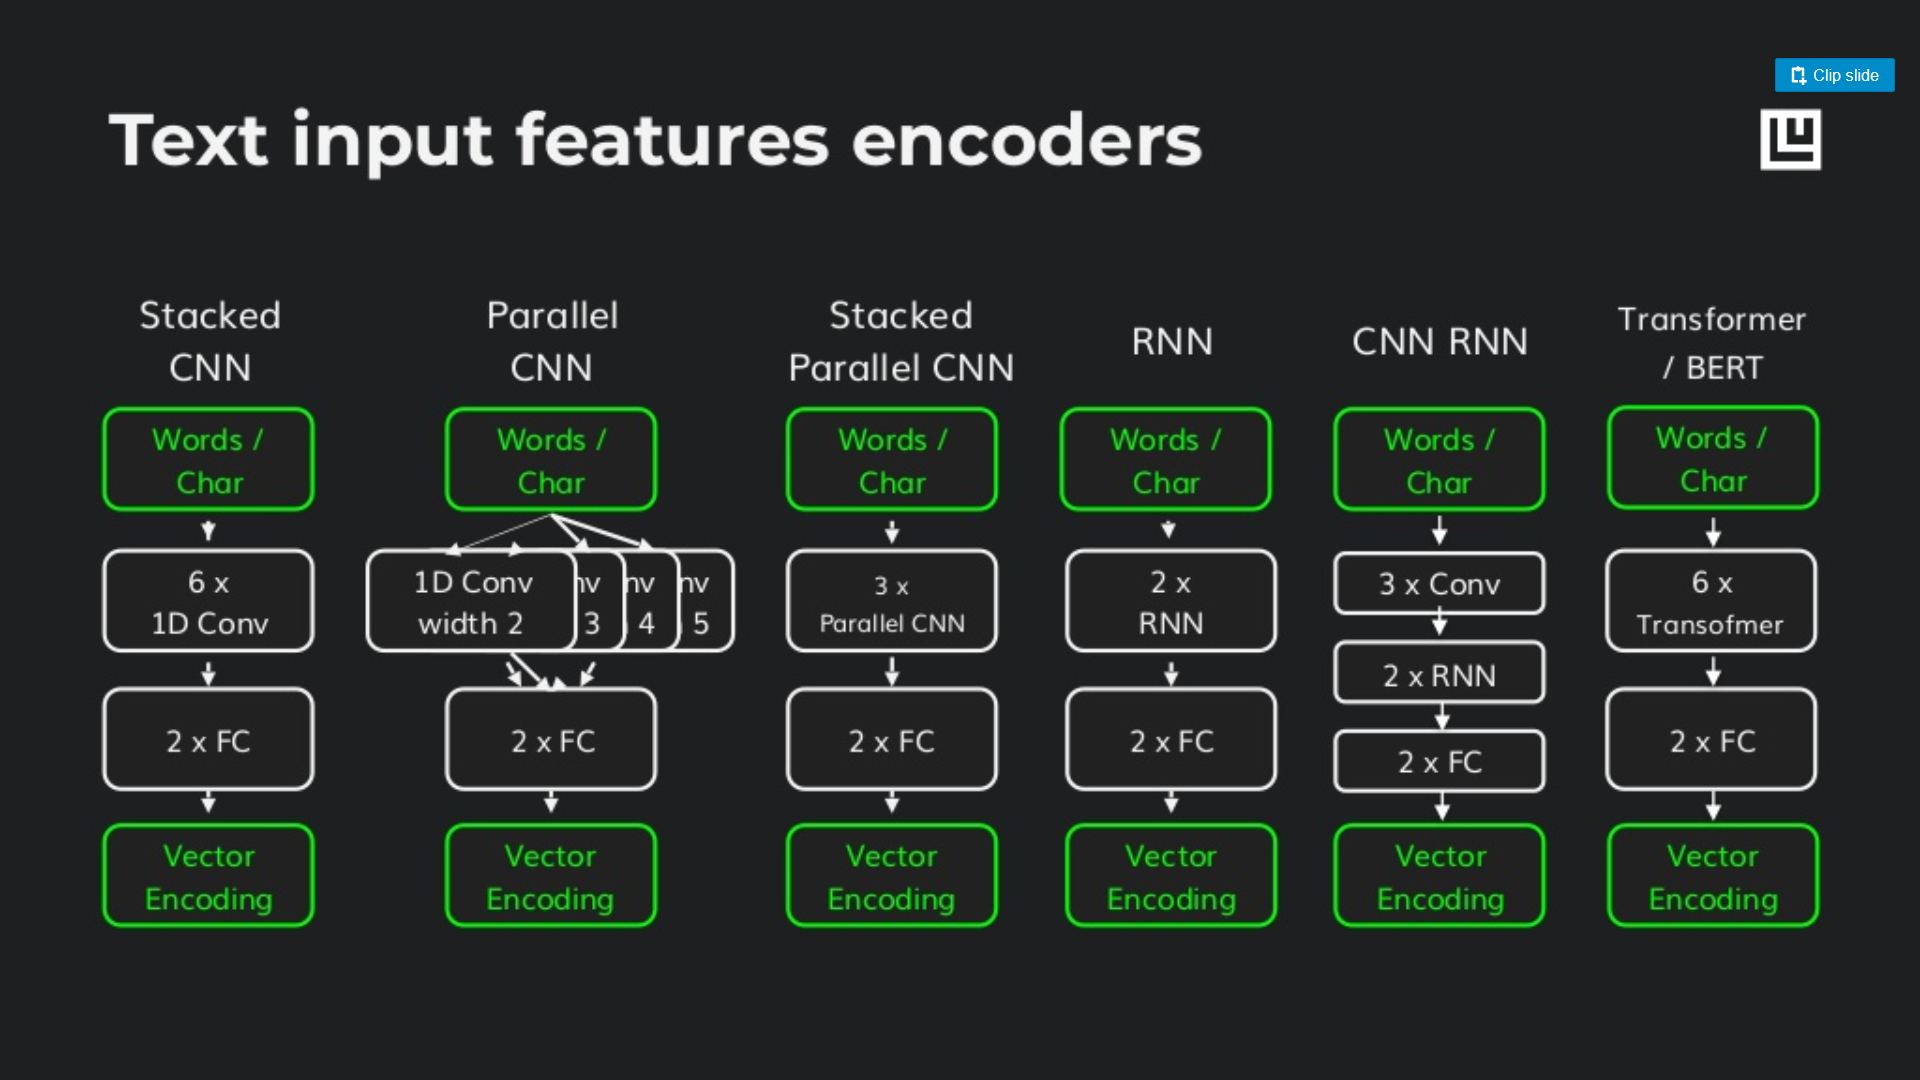

Reference: https://www.slideshare.net/ds_mi/ludwig-a-codefree-deep-learning-toolbox-piero-molino-uber-ai

## Read data

In [7]:
review = pd.read_csv('product_review.csv')
review.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,This camera is perfect for anyone who wants t...
2,Auto,2000 Hyundai Elantra Wagon if you can find ...
3,Camera,I bought this product because I need instant ...
4,Camera,Before I begin my objective review I should ...


In [8]:
review['class'].value_counts()

Auto         3010
Ford         3000
OtherAuto    3000
Camera       2990
Name: class, dtype: int64

## Split data in train and test

In [9]:
# split data into train, valid
review = shuffle(review) 
train, test= train_test_split(review, test_size=0.20, stratify=review["class"], random_state=8)
train.to_csv('product_review_train.csv', index=False)
test.to_csv('product_review_test.csv', index=False)
train.shape, test.shape

((9600, 2), (2400, 2))

## Train Tensorflow model

By default Ludwig will perform the below activites.
* Split rhe data in training(70%), validation(10%) and test sets(20%)
* Train the model on training data
* Validate the model on validation data
* Predicts on test set

In [10]:
!ludwig train --dataset 'product_review_train.csv'   \
              --config model_definition.yaml 
              #--wandb --experiment_name "Text-Classification"

2021-01-30 15:55:53.986248: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking tensorflow_addons.layers.max_unpooling_2d.MaxUnpooling2D.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.3.3-dev0 - Train

2021-01-30 15:55:55.365060: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-30 15:55:55.366068: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-30 15:55:55.370358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful 

## Visualize Train results
Ludwig comes with many visualization options. If you want to look at the learning curves of your model for instance, run:

In [11]:
!ludwig visualize --visualization learning_curves \
                  --training_statistics results/experiment_run/training_statistics.json \
                  --output_directory results/

## Predict on Test data
This command lets you use a previously trained model to predict on new data.

In [12]:
!ludwig predict --dataset product_review_test.csv \
--model_path results/experiment_run/model

2021-01-30 16:14:27.057075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking tensorflow_addons.layers.max_unpooling_2d.MaxUnpooling2D.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.3.3-dev0 - Predict

Dataset path: product_review_test.csv
Model path: results/experiment_run/model

2021-01-30 16:14:28.394560: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-30 16:14:28.395570: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-30 16:14:

On performing prediction, you get the following files in both csv and npy format:
* Class Index predictions 
* Class Index probalities for each class

In [13]:
prediction = pd.read_csv('./results/class_predictions.csv', header=None)
prediction.head()

,0
0,OtherAuto
1,Camera
2,Ford
3,Camera
4,Ford


In [14]:
# Check on some random examples
test_dataset = pd.read_csv('product_review_test.csv')
index = [100,900,575,1100,1500]
for i in index:
  print(' Actual ->', test_dataset.iloc[i]['class'], '\n Prediction -> ',prediction.iloc[i][0], '\n')

 Actual -> Ford 
 Prediction ->  Ford 

 Actual -> Camera 
 Prediction ->  Camera 

 Actual -> OtherAuto 
 Prediction ->  OtherAuto 

 Actual -> Ford 
 Prediction ->  Ford 

 Actual -> Ford 
 Prediction ->  Ford 



## Evaluate Test results
This command lets you use a previously trained model to predict on new data and evaluate the performance of the prediction compared to ground truth.

In [15]:
!ludwig evaluate --dataset 'product_review_test.csv' \
--model_path results/experiment_run/model

2021-01-30 16:16:29.016245: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking tensorflow_addons.layers.max_unpooling_2d.MaxUnpooling2D.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.3.3-dev0 - Test

Dataset path: product_review_test.csv
Model path: results/experiment_run/model

2021-01-30 16:16:30.351485: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-30 16:16:30.352431: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-01-30 16:16:30.

Running evaluation saves the evaluation metrics in the results folder in json format

## Serving
This command lets you load a pre-trained model and serve it on an http server. It uses port 8000 by default.
Once the server is up and running, you can pass the parameters defined the model configuration as inputs. 
Example:
```
curl http://0.0.0.0:8000/predict -X POST -F 'text= I have recently purchased a J30T with moderate miles  I shopped for a car that was looked after and paid more for it  As a former Auto Technician I know what to look for and what to expect yet every time I drive'
```

In [ ]:
#!ludwig serve --model_path results/experiment_run/model